In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.shape

(768, 9)

In [ ]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [ ]:
#replace nan values with mean values
for column in df.columns[1:-3]:
  df[column].replace(0,np.NaN,inplace = True)
  df[column].fillna(round(df[column].mean(skipna = True)), inplace = True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

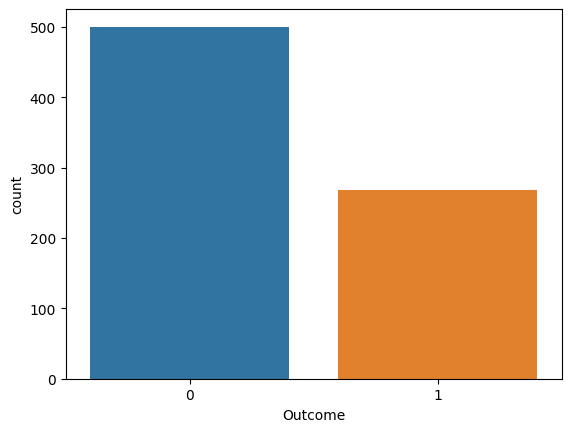

In [ ]:
sns.countplot(data=df, x=df["Outcome"])
plt.show()

In [ ]:
x = df.iloc[:,:8]
y = df.iloc[:,8]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state= 0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier()
knn_fit= knn.fit(x_train,y_train)

In [ ]:
knn_pred = knn_fit.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,recall_score,f1_score,precision_score,accuracy_score

In [ ]:
print("Confusion matrix : ")
print(confusion_matrix(y_test,knn_pred))

Confusion matrix : 
[[88 19]
 [19 28]]


In [ ]:
print("Accuracy score : ",accuracy_score(y_test,knn_pred))

Accuracy score :  0.7532467532467533


In [ ]:
print("Precision Score : ",precision_score(y_test,knn_pred))

Precision Score :  0.5957446808510638


In [ ]:
print("Recall Score : ", recall_score(y_test,knn_pred))

Recall Score :  0.5957446808510638


In [ ]:
print("F1 Score : ", f1_score(y_test,knn_pred))

F1 Score :  0.5957446808510638


<function matplotlib.pyplot.show(close=None, block=None)>

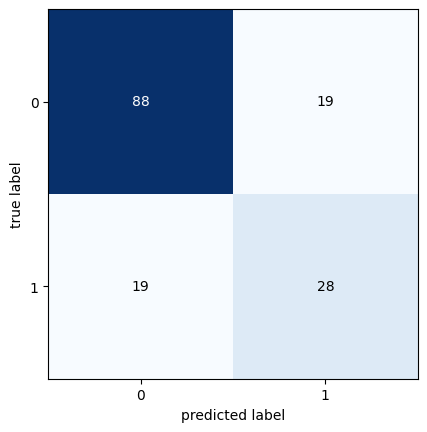

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,knn_pred)
plot_confusion_matrix(cm)
plt.show